### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# # In case of errors, check if you are using the correct versions of the libraries. This notebook works on the following versions of libraries. Specify these versions if you get version related errors.
# TensorFlow version: 2.17.0
# Pandas version: 2.2.2
# NumPy version: 1.26.4
# Scikit-learn version: 1.5.2
# Keras version: 3.4.1

# print("TensorFlow version:", tf.__version__)
# print("Pandas version:", pd.__version__)
# print("NumPy version:", np.__version__)
# print("Scikit-learn version:", sklearn.__version__)
# print("Keras version:", tf.keras.__version__)

### Loading data

In [6]:
!unzip MNIST_data.zip
!ls

Archive:  MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
MNIST_data.zip	sample_data  test.csv  train.csv


In [7]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [8]:
data.head(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

### Extracting feature variables and target variable

In [9]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [10]:
data_x.head(2)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 784 columns]

### Data visualization

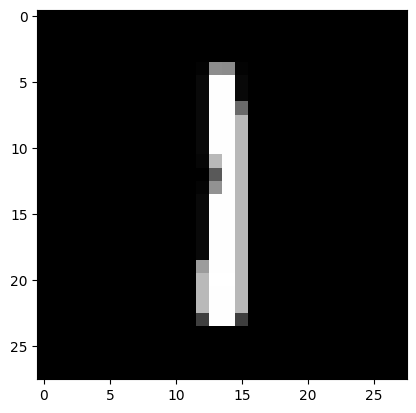

In [11]:
img = data_x.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [12]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [17]:
# model = keras.Sequential([
#     keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(10, activation=tf.nn.softmax)])

# Newer versions of Keras support this:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [19]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7629 - loss: 5.5944 - val_accuracy: 0.8933 - val_loss: 0.6175
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9247 - loss: 0.3884 - val_accuracy: 0.9236 - val_loss: 0.3980
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9461 - loss: 0.2137 - val_accuracy: 0.9343 - val_loss: 0.3009
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9571 - loss: 0.1555 - val_accuracy: 0.9429 - val_loss: 0.2739
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9628 - loss: 0.1404 - val_accuracy: 0.9405 - val_loss: 0.3027


### Model evaluation

In [20]:
model.predict(X_test).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The predicted label is: 0


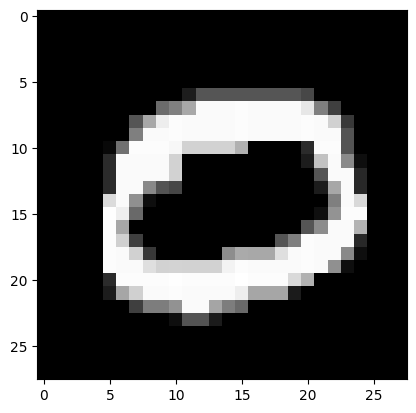

In [21]:
img = X_test.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance